In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random


In [2]:
def partc_motionmodel(Xt1,t1,phil,phir,t2,r,w,sigmal,sigmar):
    Xt2=np.zeros((Xt1.shape[0],Xt1.shape[1],Xt1.shape[2]))
    dt=t2-t1
    for i in range(0,len(Xt1)):
        errorl=sigmal*np.random.randn()
        errorr=sigmar*np.random.randn()
        philtrue=phil+errorl
        phirtrue=phir+errorr
        omegatrue=np.array([[0, -r/w*(phirtrue-philtrue), r/2*(phirtrue+philtrue)],[r/w*(phirtrue-philtrue), 0, 0],[0,0,0]])
        Xt2[i]=np.matmul(Xt1[i],scipy.linalg.expm(dt*omegatrue))

    return Xt2


In [3]:

def observation_update(zt, xt, sigmap):
    w = np.zeros((len(xt),1))
    for i in range(len(xt)):
        w[i] = scipy.stats.multivariate_normal.pdf(zt, mean = [xt[i,0,2], xt[i,1,2]] , cov = (sigmap**2)*np.array([[1,0],[0,1]]))

    beliefX = np.empty((xt.shape[0], xt.shape[1], xt.shape[2]))   
    
    beliefX = np.array(random.choices(xt, weights= w, k = 1000))

    return beliefX


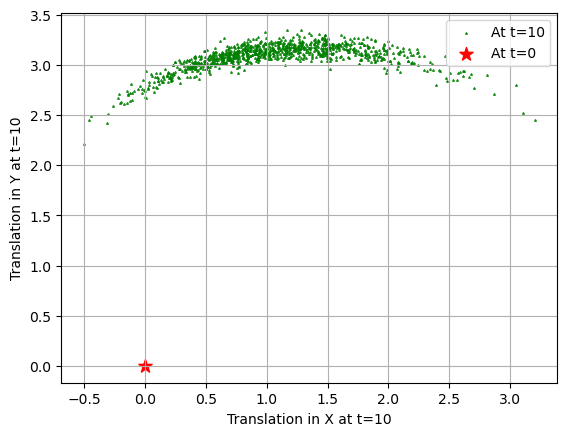

The mean of translation in X and Y of particles at t=10 

[1.06888413 3.08463077] 

The Covariance of translation in X and Y of the particles at t=10 

[[0.36835336 0.03176702]
 [0.03176702 0.01719399]]


In [4]:


def part_e(N=1000):

    X0= np.array([[1,0,0],[0,1,0],[0,0,1]])
    X0= np.tile(X0, (N,1,1))
    t2= 10
    phil= 1.5
    phir= 2
    r= 0.25
    w= 0.5
    sigmal = 0.05
    sigmar = 0.05
    t1 = 0

    X2 = partc_motionmodel(X0,t1,phil,phir,t2,r,w,sigmal,sigmar)
    mean=np.mean(X2[:,:-1,2], axis = 0)
    covariance=np.cov(X2[:,:-1,2], rowvar = False)  
    plt.scatter(X2[:,0,2], X2[:,1,2],marker="^",s=1,c="green",label="At t=10")
    plt.scatter(0,0,marker="*",s=100,c='red',label="At t=0")
    plt.xlabel("Translation in X at t=10")
    plt.ylabel("Translation in Y at t=10")
    plt.legend()
    plt.grid()
    plt.show()
    print("The mean of translation in X and Y of particles at t=10","\n")
    print(mean,"\n")
    print("The Covariance of translation in X and Y of the particles at t=10","\n")
    print(covariance)
part_e(1000)

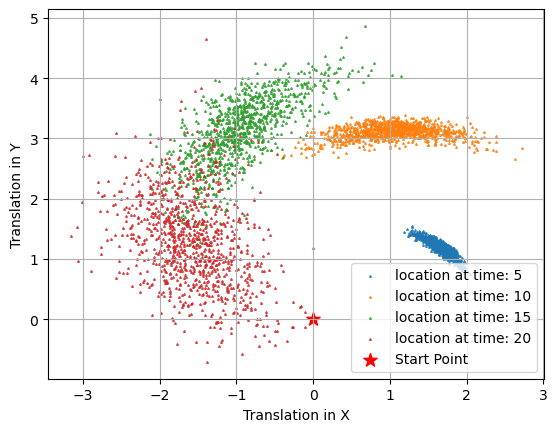

Mean at time 5 is: [1.64962645 1.19399753]  

Mean at time 10 is: [1.04170396 3.10858654]  

Mean at time 15 is: [-0.93243864  3.13381166]  

Mean at time 20 is: [-1.57787047  1.29832931]  

Covariance at time 5 is: [[ 0.01932008 -0.0152661 ]
 [-0.0152661   0.01538889]]
Covariance at time 10 is: [[0.24354285 0.00808846]
 [0.00808846 0.01427473]]
Covariance at time 15 is: [[0.25918651 0.20761804]
 [0.20761804 0.33608421]]
Covariance at time 20 is: [[ 0.24810728 -0.13181942]
 [-0.13181942  0.58783297]]


In [5]:
def partf(N=1000):

    X = np.asarray([[1,0,0],[0,1,0],[0,0,1]])
    X = np.tile(X, (N,1,1))
    t2 = [5,10,15,20]
    phil = 1.5
    phir = 2
    r = 0.25
    w = 0.5
    sigmal = 0.05
    sigmar = 0.05
    t1 = 0
    mean = []
    covariance = []
    for i in range(0,len(t2)):
        X= partc_motionmodel(X,t1,phil,phir,t2[i],r,w,sigmal,sigmar)
        mean.append(np.mean(X[:,:-1,2], axis = 0))
        covariance.append(np.cov(X[:,:-1,2], rowvar = False))
        t1 = t2[i]       
        plt.scatter(X[:,0,2], X[:,1,2], s=1,marker="^", label="location at time: %i" %(t1))
    plt.scatter(0,0,marker="*",s=100,c='red',label="Start Point")
    plt.legend()
    plt.xlabel("Translation in X")
    plt.ylabel("Translation in Y")
    plt.grid()
    plt.show()
    for i in range(0,len(mean)):
        yoo=t2[i]
        yoomean=mean[i]
        print("Mean at time %i is: %s "%(yoo, yoomean),"\n")
    for i in range(len(covariance)):
        yooagain=t2[i]
        print("Covariance at time %i is: %s"%(yooagain,covariance[i]))
partf()  

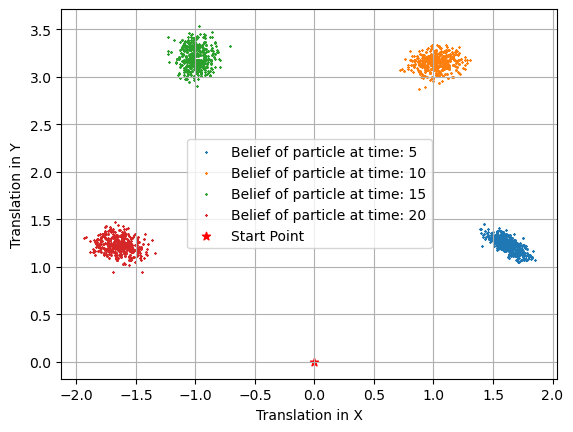

Mean at time 5 is: [1.62323528 1.23911511]  

Mean at time 10 is: [1.02764346 3.1418351 ]  

Mean at time 15 is: [-1.002317    3.19951564]  

Mean at time 20 is: [-1.64303533  1.22492544]  

Covariance at time 5 is: [[ 0.00574721 -0.00337914]
 [-0.00337914  0.0044551 ]]
Covariance at time 10 is: [[0.00820796 0.00048556]
 [0.00048556 0.00490993]]
Covariance at time 15 is: [[4.74168216e-03 9.25641978e-05]
 [9.25641978e-05 9.40023873e-03]]
Covariance at time 20 is: [[ 0.0077501  -0.0010482 ]
 [-0.0010482   0.00518204]]


In [6]:
def clear_concept_part(N=1000):

    X = np.asarray([[1,0,0],[0,1,0],[0,0,1]])
    X = np.tile(X, (N,1,1))
    t2 = [5,10,15,20]
    phil = 1.5
    phir = 2
    r = 0.25
    w = 0.5
    sigmal = 0.05
    sigmar = 0.05
    sigmap = 0.10
    t1 = 0
    mean = []
    covariance = []
    observations = np.asarray([[1.6561, 1.2847], [1.0505, 3.1059], [-0.9875, 3.2118], [-1.6450, 1.1978]])
    for i in range(len(t2)):
        X =  partc_motionmodel(X,t1,phil,phir,t2[i],r,w,sigmal,sigmar)
        X = observation_update(observations[i],X , sigmap)
        mean.append(np.mean(X[:,:-1,2], axis = 0))
        covariance.append(np.cov(X[:,:-1,2], rowvar = False))  
        t1=t2[i]
        plt.scatter(X[:,0,2], X[:,1,2], s=1,marker='x', label="Belief of particle at time: %i"%(t1))       
    plt.scatter(0,0,c="red",marker='*',label='Start Point')
    plt.legend()
    plt.xlabel("Translation in X")
    plt.ylabel("Translation in Y")
    plt.grid()
    plt.show()

    for i in range(0,len(mean)):
        yoo=t2[i]
        yoomean=mean[i]
        print("Mean at time %i is: %s "%(yoo, yoomean),"\n")
    for i in range(len(covariance)):
        yooagain=t2[i]
        print("Covariance at time %i is: %s"%(yooagain,covariance[i]))
clear_concept_part()

In [11]:
Xt2=np.zeros((2,3,3))
print(Xt2)
Xt2[0]=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(Xt2)
print(Xt2[:,:-1,2])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[[1. 2. 3.]
  [4. 5. 6.]
  [7. 8. 9.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[3. 6.]
 [0. 0.]]
